In [49]:
import pandas as pd
import numpy
import matplotlib

In [50]:
def load_data(file_path):

    data = pd.read_csv(file_path)
    return data # data type is a DataFrame

In [51]:
data_filepath = "/Users/aditishah/HR Analytics/data/employee_data.csv"
dataframe = load_data(data_filepath)

In [54]:

# Identify categorical variables (for demonstration purposes)
categorical_variables = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Exclude categorical variables from the DataFrame
numerical_dataframe = dataframe.drop(columns=categorical_variables)

# Calculate the correlation matrix
correlation_matrix = numerical_dataframe.corr()

print(correlation_matrix)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

In [52]:
print(dataframe.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


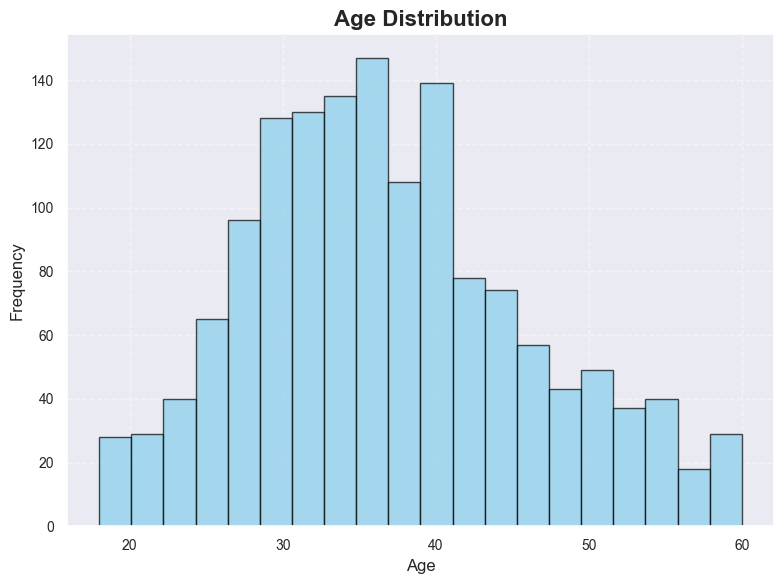

In [83]:
import matplotlib.pyplot as plt

# Create the histogram for Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(dataframe['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # Adding transparency
plt.title('Age Distribution', fontsize=16, fontweight='bold')  # Adding title with larger font size and bold
plt.xlabel('Age', fontsize=12)  # Adding label for x-axis with larger font size
plt.ylabel('Frequency', fontsize=12)  # Adding label for y-axis with larger font size
plt.xticks(fontsize=10)  # Increasing font size of x-axis ticks
plt.yticks(fontsize=10)  # Increasing font size of y-axis ticks
plt.grid(True, linestyle='--', alpha=0.5)  # Adding grid lines with transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

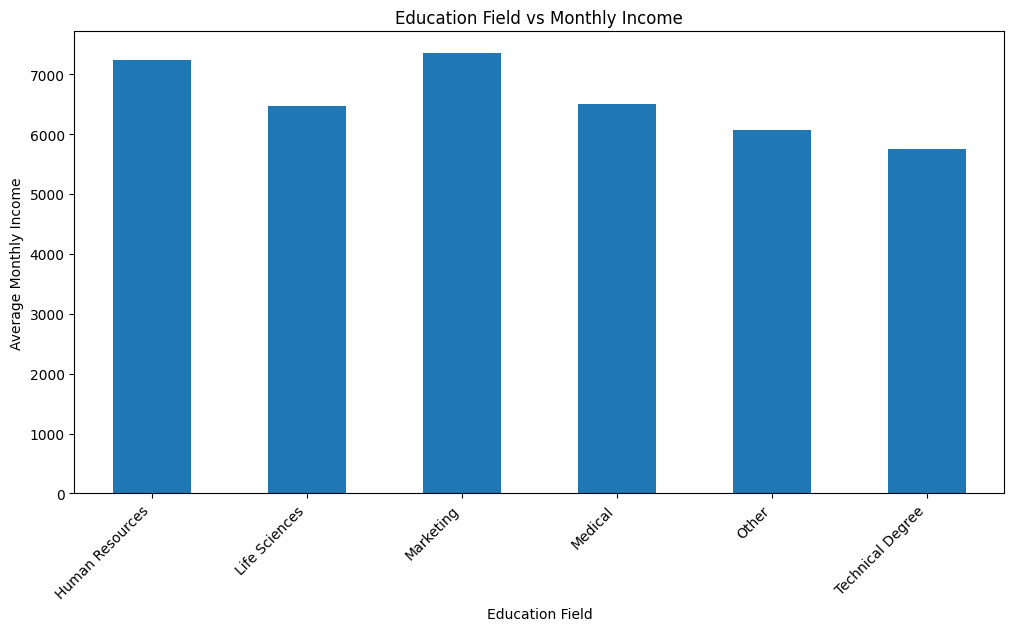

In [58]:

# Visualization 2: EducationField and MonthlyIncome (Bar graph)
plt.figure(figsize=(12, 6))
dataframe.groupby('EducationField')['MonthlyIncome'].mean().plot(kind='bar')
plt.title('Education Field vs Monthly Income')
plt.xlabel('Education Field')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45, ha='right')
plt.show()

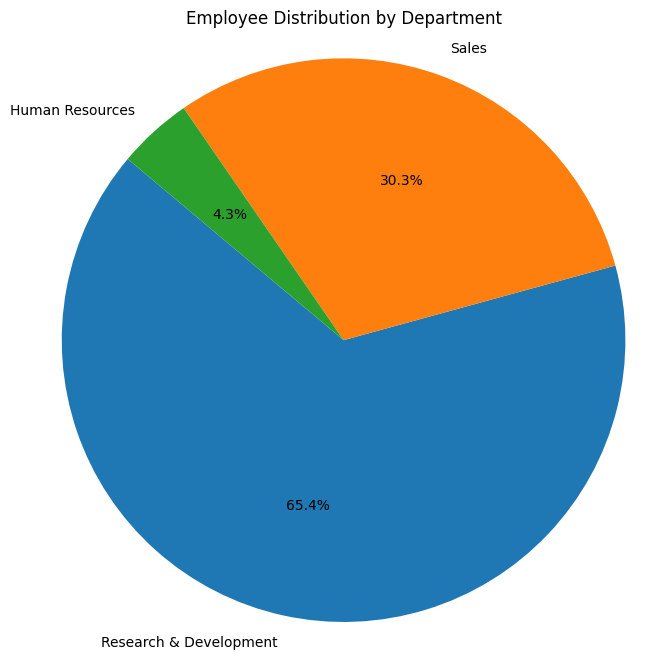

In [60]:

# Count the number of employees in each department
department_counts = dataframe['Department'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:

# Create the bar graph for Department and MonthlyIncome
plt.figure(figsize=(10, 6))
dataframe.groupby('Department')['MonthlyIncome'].mean().plot(kind='bar', color='orange')
plt.title('Department vs Monthly Income')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=0)
plt.show()

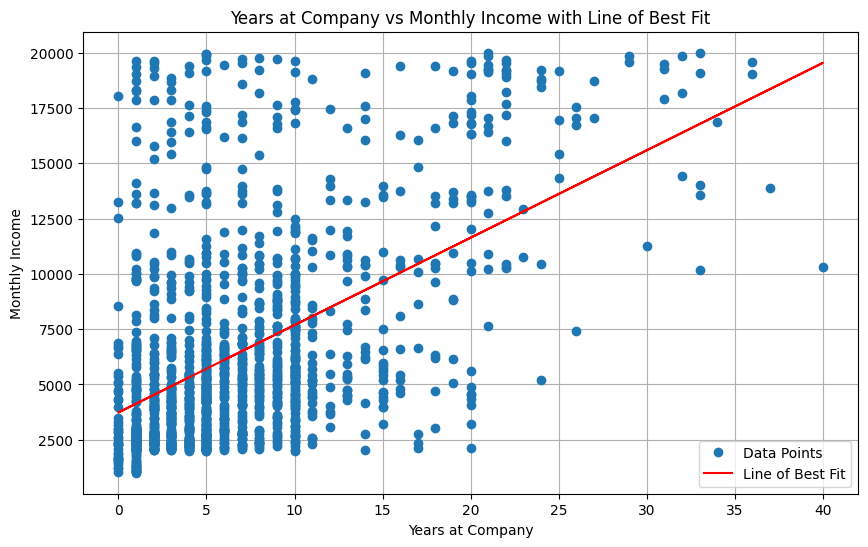

In [44]:
import numpy as np
# Fitting a polynomial to the data
z = np.polyfit(dataframe['YearsAtCompany'], dataframe['MonthlyIncome'], 1)
p = np.poly1d(z)

# Plotting the line of best fit for YearsAtCompany and MonthlyIncome
plt.figure(figsize=(10, 6))
plt.plot(dataframe['YearsAtCompany'], dataframe['MonthlyIncome'], marker='o', linestyle='', label='Data Points')
plt.plot(dataframe['YearsAtCompany'], p(dataframe['YearsAtCompany']), 'r-', label='Line of Best Fit')
plt.title('Years at Company vs Monthly Income with Line of Best Fit')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

# Generally an increasing trend, not highly correlated (correlation about 0.4)


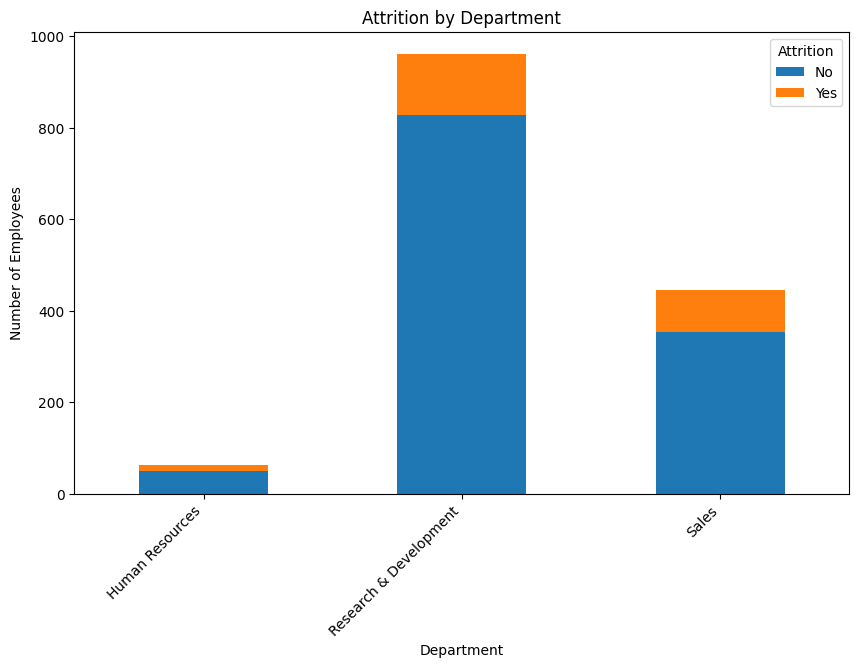

In [63]:

# Group the data by Department and Attrition and count the occurrences
department_attrition_counts = dataframe.groupby(['Department', 'Attrition']).size().unstack()

# Create a stacked bar chart
department_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.show()

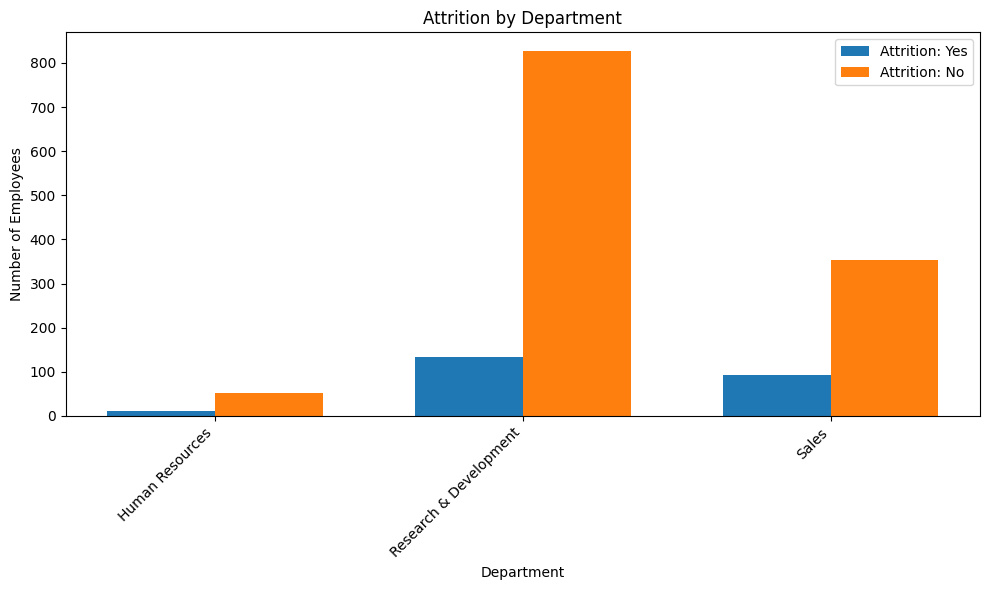

In [64]:

# Group the data by Department and Attrition and count the occurrences
department_attrition_counts = dataframe.groupby(['Department', 'Attrition']).size().unstack()

# Define the labels and positions for the bars
labels = department_attrition_counts.index
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for 'Yes' attrition
bar1 = ax.bar(x - width/2, department_attrition_counts['Yes'], width, label='Attrition: Yes')

# Plot the bars for 'No' attrition
bar2 = ax.bar(x + width/2, department_attrition_counts['No'], width, label='Attrition: No')

# Add labels, title, and legend
ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
ax.set_title('Attrition by Department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

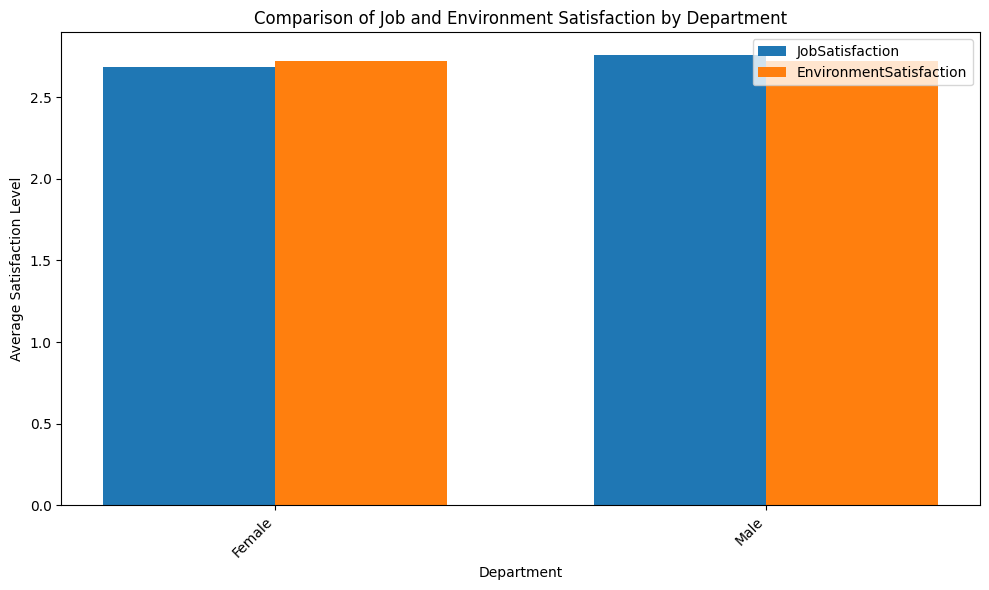

In [69]:

# Group the data by Department and calculate the average satisfaction levels
satisfaction_data = dataframe.groupby('Gender')[['JobSatisfaction', 'EnvironmentSatisfaction']].mean()

# Define the labels and positions for the bars
labels = satisfaction_data.index
x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for 'JobSatisfaction'
bar1 = ax.bar(x - width/2, satisfaction_data['JobSatisfaction'], width, label='JobSatisfaction')

# Plot the bars for 'EnvironmentSatisfaction'
bar2 = ax.bar(x + width/2, satisfaction_data['EnvironmentSatisfaction'], width, label='EnvironmentSatisfaction')

# Add labels, title, and legend
ax.set_xlabel('Department')
ax.set_ylabel('Average Satisfaction Level')
ax.set_title('Comparison of Job and Environment Satisfaction by Department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

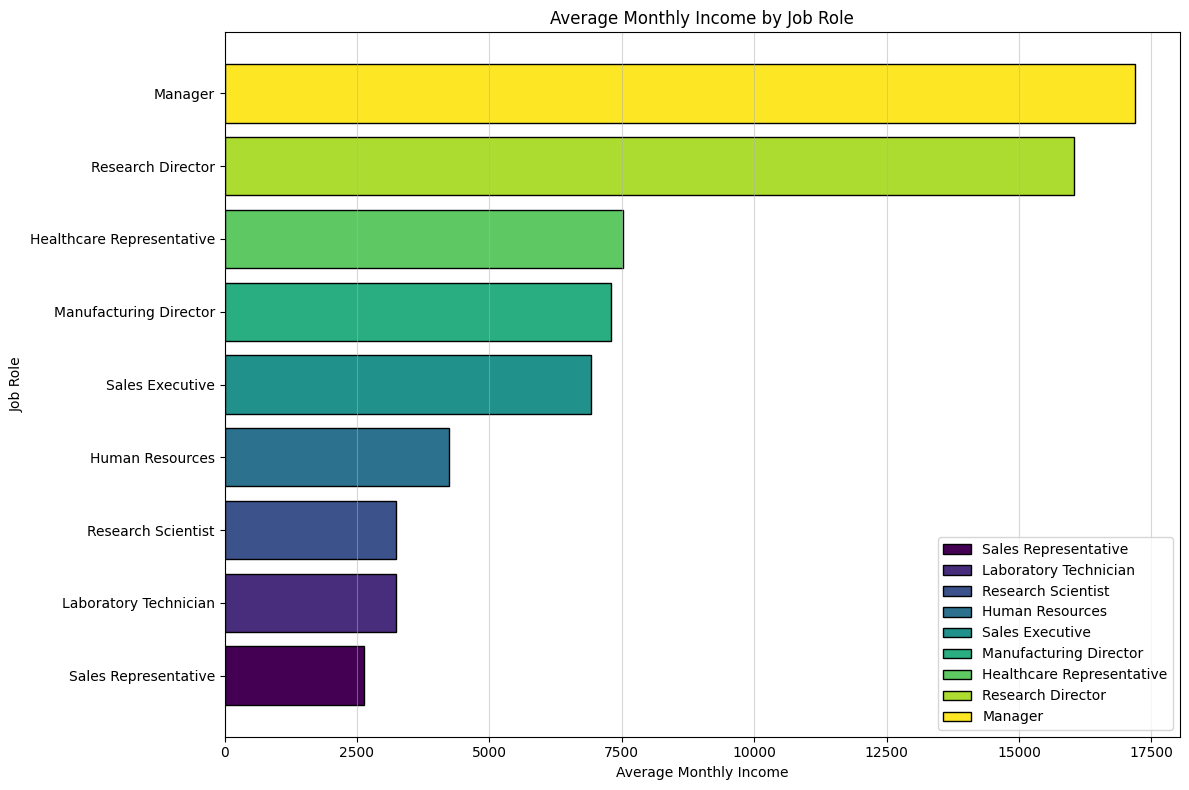

In [77]:

# Group the data by JobRole and calculate the average MonthlyIncome
monthly_income_data = dataframe.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

# Define the labels and positions for the bars
labels = monthly_income_data.index
x = np.arange(len(labels))
monthly_income_values = monthly_income_data.values

# Define colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_income_values)))

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the bar chart for average MonthlyIncome by JobRole with different colors for each bar
for i in range(len(monthly_income_values)):
    plt.barh(x[i], monthly_income_values[i], color=colors[i], edgecolor='black', label=labels[i])

# Add labels, title, and ticks
plt.xlabel('Average Monthly Income')
plt.ylabel('Job Role')
plt.title('Average Monthly Income by Job Role')
plt.yticks(x, labels)
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

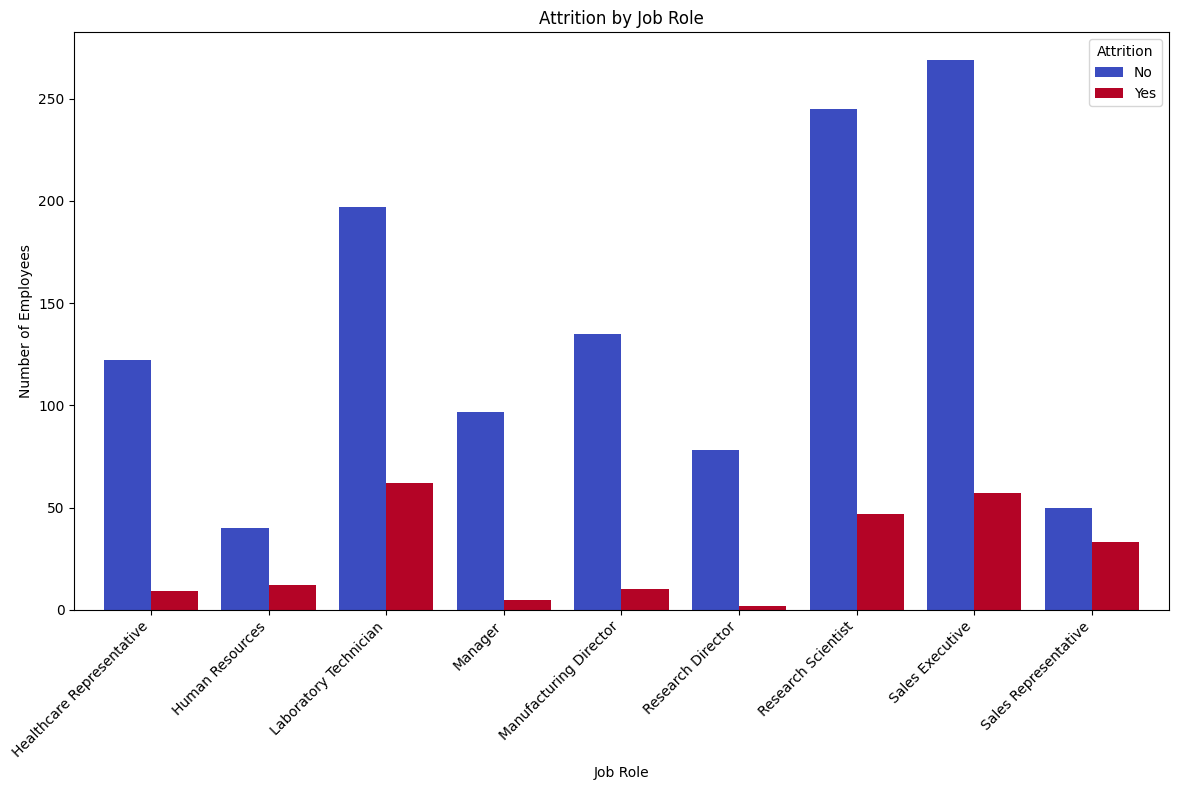

In [78]:

# Group the data by JobRole and Attrition and calculate the counts
attrition_jobrole_counts = dataframe.groupby(['JobRole', 'Attrition']).size().unstack()

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Plot the grouped bar chart
attrition_jobrole_counts.plot(kind='bar', stacked=False, width=0.8, colormap='coolwarm', ax=plt.gca())

# Add labels, title, and legend
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/_b/hfsp9hqn3kj2vzyk2fz2fr7c0000gn/T/ipykernel_22713/931371270.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataframe, x='YearsInCurrentRole', y='MonthlyIncome', hue='JobRole', palette='tab10', ci=None)


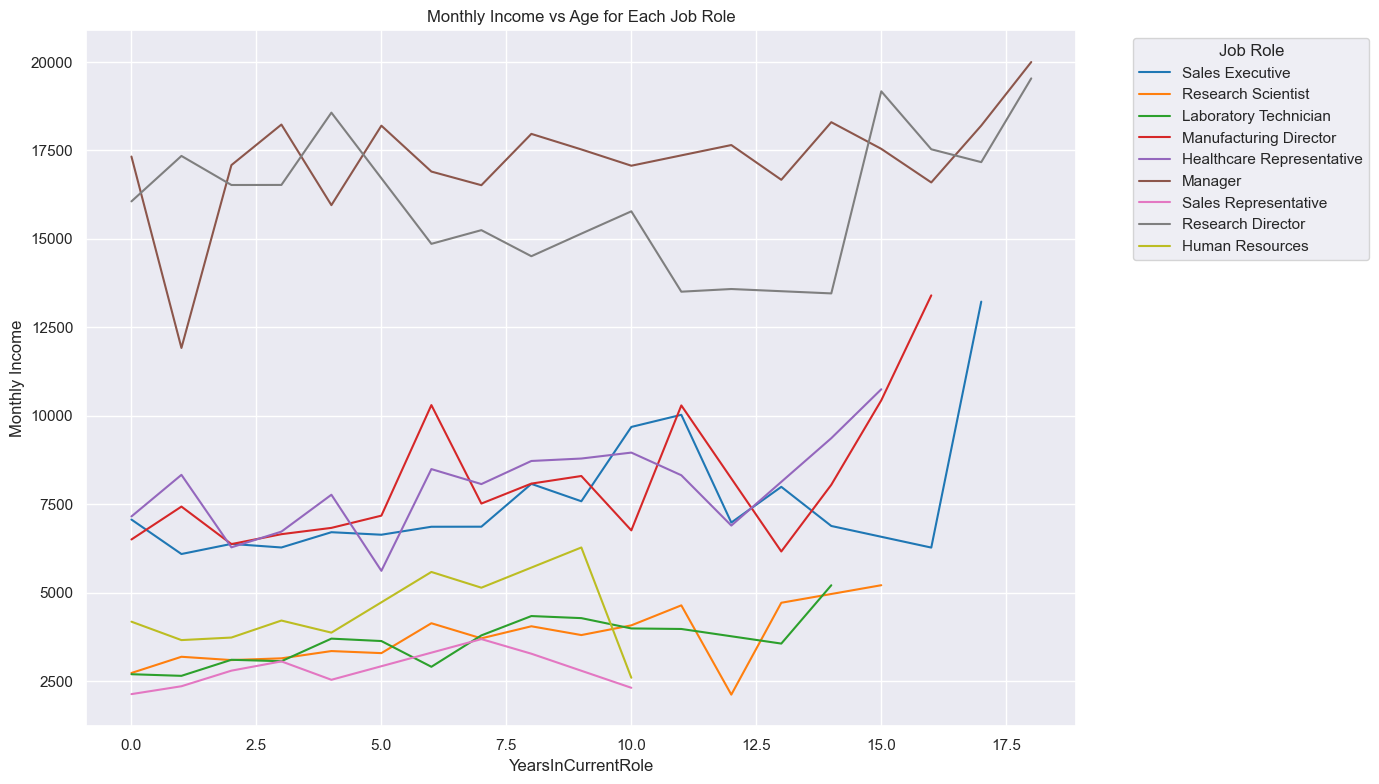

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="darkgrid")

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=dataframe, x='YearsInCurrentRole', y='MonthlyIncome', hue='JobRole', palette='tab10', ci=None)
plt.title('Monthly Income vs Age for Each Job Role')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Monthly Income')
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
